# Introdução

O ambiente acadêmico é frequentemente associado a períodos desafiadores, onde os estudantes enfrentam uma combinação única de demandas educacionais, sociais e pessoais. A fim de compreender a complexidade dessas experiências, realizei uma análise exploratória de dados com foco nos fatores psicológicos, fisiológicos, acadêmicos, sociais e ambientais. 

Como esses fatores relacionam entre si? Qual o impacto da ansiedade no desempenho acadêmico?


**Link para o dataset**
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data

**Classificação das colunas**
**Fatores psicológicos:** 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
**Fatores fisiológicos:** 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem
**Fatores ambientais:** 'noise_level', 'living_conditions', 'safety', 'basic_needs',
**Fatores acadêmicos:** 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
**Fatores sociais:** 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

# Perguntas que responderemos

**Estatística descritiva:**
1) Quantos alunos estão no conjunto de dados?
2) Qual é o nível médio de ansiedade dos alunos no conjunto de dados?
3) Quantos estudantes relataram histórico de problemas de saúde mental?

**Fatores psicológicos:**
1) Quantos alunos apresentam nível de autoestima abaixo da média?
2) Qual a porcentagem de estudantes que relataram sofrer de depressão?

**Fatores Fisiológicos:**
1) Quantos alunos sentem dores de cabeça com frequência?
2) Qual é a leitura média da pressão arterial entre os alunos?
3) Quantos estudantes classificam a qualidade do sono como ruim?

**Fatores Ambientais:**
1) Quantos estudantes vivem em condições com elevados níveis de ruído?
2) Qual a percentagem de estudantes que se sentem inseguros nas suas condições de vida?
3) Quantos alunos relataram não ter suas necessidades básicas atendidas?

**Fatores Acadêmicos:**
1) Quantos estudantes avaliam seu desempenho acadêmico como abaixo da média?
2) Quantos estudantes têm preocupações sobre suas futuras carreiras?

**Fatores sociais:**
1) Quantos estudantes sentem que têm um forte apoio social?
2) Qual a porcentagem de alunos que sofreram bullying?
3) Quantos alunos participam de atividades extracurriculares?

**Análise comparativa:**
1) Existe correlação entre nível de ansiedade e desempenho acadêmico?
2) Os alunos com má qualidade de sono também relatam níveis mais elevados de depressão?
3) Os alunos que sofrem bullying têm maior probabilidade de ter um histórico de problemas de saúde mental?

In [138]:
#Import de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.image as mpimg


#Definindo exibição máxima de linhas e colunas
#pd.set_option("display.max_rows", 15)
#pd.set_option("display.max_columns", None)

In [139]:
#Carregando dataset
df = pd.read_csv("StressLevelDataset.csv")

In [140]:
#Conhecendo o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [141]:
print("Temos {} linhas e {} colunas, não temos dados nulos no dataset.".format(df.shape[0], df.shape[1]))

Temos 1100 linhas e 21 colunas, não temos dados nulos no dataset.


In [142]:
#Valores mínimos, máximos, média e mediana de cada coluna (fator)
df.describe().loc[['min','max', 'mean', '50%']].T

,min,max,mean,50%
anxiety_level,0.0,21.0,11.063636,11.0
self_esteem,0.0,30.0,17.777273,19.0
mental_health_history,0.0,1.0,0.492727,0.0
depression,0.0,27.0,12.555455,12.0
headache,0.0,5.0,2.508182,3.0
...,...,...,...,...
social_support,0.0,3.0,1.881818,2.0
peer_pressure,0.0,5.0,2.734545,2.0
extracurricular_activities,0.0,5.0,2.767273,2.5
bullying,0.0,5.0,2.617273,3.0


# Estatística descritiva:

**1) Quantos alunos estão no conjunto de dados?**
**2) Qual é o nível médio de ansiedade dos alunos no conjunto de dados?**
**3) Quantos estudantes relataram histórico de problemas de saúde mental?**

In [143]:
#1) Quantos alunos estão no conjunto de dados?
df.shape[0]
print("Temos {} estudantes no conjunto de dados.".format(df.shape[0]))

Temos 1100 estudantes no conjunto de dados.


In [144]:
#2) Qual é o nível médio de ansiedade dos alunos no conjunto de dados?
df.anxiety_level.mean()
print("A média do nível de ansiedade é de {:.2f}. O range vai de {} até {}.".format(df.anxiety_level.mean(), df.anxiety_level.min(), df.anxiety_level.max()))

A média do nível de ansiedade é de 11.06. O range vai de 0 até 21.


In [145]:
#3) Quantos estudantes relataram histórico de problemas de saúde mental?
df.mental_health_history.value_counts()
print("{} estudantes relataram histórico de problemas de saúde mental.".format(df.query('mental_health_history > 0').shape[0]))

542 estudantes relataram histórico de problemas de saúde mental.


# Fatores psicológicos:

**1) Quantos alunos apresentam nível de autoestima abaixo da média?**
**2) Qual a porcentagem de estudantes que relataram sofrer de depressão?**

In [146]:
#1) Quantos alunos apresentam nível de autoestima abaixo da média?
self_esteem_avg = df.self_esteem.mean()
df.query('self_esteem < 17.7').shape[0]
print("{} estudantes reportaram autoestima abaixo da média (17.7).".format(df.query('self_esteem < 17.7').shape[0]))

507 estudantes reportaram autoestima abaixo da média (17.7).


In [147]:
#2) Qual a porcentagem de estudantes que relataram sofrer de depressão?
df.query('depression > 0')
print("{} estudantes relataram sofrer algum nível de depressão, isso representa {:.0f}% da base.".format(df.query('depression > 0').shape[0], (df.query('depression > 0').shape[0]/df.shape[0]*100)))

1056 estudantes relataram sofrer algum nível de depressão, isso representa 96% da base.


# Fatores Fisiológicos:

**1) Quantos alunos sentem dores de cabeça com frequência?**
**2) Qual é a leitura média da pressão arterial entre os alunos?**
**3) Quantos estudantes classificam a qualidade do sono como ruim?**

In [148]:
#1) Quantos alunos sentem dores de cabeça com frequência?
#Como frequente, adotei valores >= 4 na coluna "headache" que vai de 0 a 5
df.groupby('headache')['headache'].count()
df['headache_frequence'] = np.where(df['headache'] == 0, "None", np.where(df['headache'] == 1, "Low", np.where(df['headache'] == 2, "Medium", np.where(df['headache'] == 3, "High", np.where(df['headache'] == 4, "High", np.where(df['headache'] == 5, "High", "-"))))))
df.groupby('headache_frequence')['headache'].count()
print("{} estudantes relataram sentir dores de cabeça frequente".format(df.query('headache >= 4').shape[0]))

269 estudantes relataram sentir dores de cabeça frequente


In [149]:
#2) Qual é a leitura média da pressão arterial entre os alunos?
print("A pressão arterial média entre os estudantes é de {:.2f}. Esse valor está em alguma escala que não consegui identificar, o que não nos diz muito.".format(df.blood_pressure.mean()))

A pressão arterial média entre os estudantes é de 2.18. Esse valor está em alguma escala que não consegui identificar, o que não nos diz muito.


In [150]:
#3) Quantos estudantes classificam a qualidade do sono como ruim?
df.groupby('sleep_quality')['sleep_quality'].count()
df['sleep_class'] = np.where(df['sleep_quality'] == 0, "Ruim", np.where(df['sleep_quality'] == 1, "Ruim", np.where(df['sleep_quality'] == 2, "Ruim", np.where(df['sleep_quality'] == 3, "Normal", np.where(df['sleep_quality'] == 4, "Boa", np.where(df['sleep_quality'] == 5, "Excelente", "-"))))))
print("A escala vai de 0 a 5, classificamos como 'Ruim', valores <= 2, sendo assim {} estudantes relataram qualidade do sono como ruim".format(df.query('sleep_quality <= 2').shape[0]))

A escala vai de 0 a 5, classificamos como 'Ruim', valores <= 2, sendo assim 550 estudantes relataram qualidade do sono como ruim


# Fatores Ambientais:

**1) Quantos estudantes vivem em condições com elevados níveis de ruído?**
**2) Qual a percentagem de estudantes que se sentem inseguros nas suas condições de vida?**
**3) Quantos alunos relataram não ter suas necessidades básicas atendidas?**

In [151]:
df.groupby('noise_level')['noise_level'].count()

noise_level
0     36
1    188
2    313
3    289
4    137
5    137
Name: noise_level, dtype: int64

In [152]:
#1) Quantos estudantes vivem em condições com elevados níveis de ruído?
df.groupby('noise_level')['noise_level'].count()
print("A escala de ruído vai de 0 a 5, classificamos como nível elevado, valores >= 4, sendo assim {} estudantes relataram viverem em elevados níveis de ruido".format(len(df.loc[df['noise_level'] >=4])))

A escala de ruído vai de 0 a 5, classificamos como nível elevado, valores >= 4, sendo assim 274 estudantes relataram viverem em elevados níveis de ruido


In [153]:
#2) Qual a percentagem de estudantes que se sentem inseguros nas suas condições de vida?
df.groupby('living_conditions')['living_conditions'].count()
len(df.loc[df['living_conditions'] <=2])
print("A escala de 'conforto' vai de 0 a 5, classificamos como inseguro, valores <= 1, sendo assim {} estudantes relataram viverem em níveis de insegurança.".format(len(df.loc[df['living_conditions'] <=1])))

A escala de 'conforto' vai de 0 a 5, classificamos como inseguro, valores <= 1, sendo assim 205 estudantes relataram viverem em níveis de insegurança.


In [154]:
#3) Quantos alunos relataram não ter suas necessidades básicas atendidas?
df.groupby('basic_needs')['basic_needs'].count()
print("{} estudantes relataram não terem suas necessidades básicas atendidas.".format(len(df.loc[df['basic_needs'] ==0])))

40 estudantes relataram não terem suas necessidades básicas atendidas.


# Análise comparativa:

**1) Existe correlação entre nível de ansiedade e desempenho acadêmico?**
**2) Os alunos com má qualidade de sono também relatam níveis mais elevados de depressão?**
**3) Os alunos que sofrem bullying têm maior probabilidade de ter um histórico de problemas de saúde mental?**

,anxiety_level,academic_performance
anxiety_level,1.000000,-0.649601
academic_performance,-0.649601,1.000000


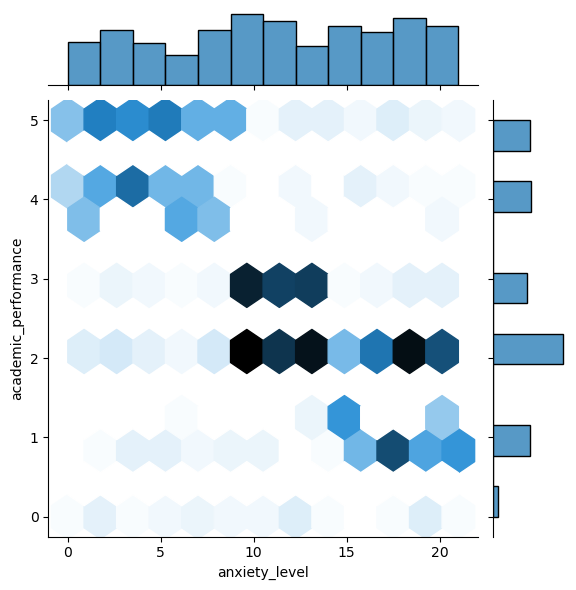

In [155]:
#1) Existe correlação entre nível de ansiedade e desempenho acadêmico?
sns.jointplot(x='anxiety_level',y='academic_performance',data=df,kind='hex')
df[['anxiety_level', 'academic_performance']].corr()

In [156]:
#1) Existe correlação entre nível de ansiedade e desempenho acadêmico?
print("Temos uma correlação negativa moderada de -0.64 entre ansiedade e perfomance acadêmica.")

Temos uma correlação negativa moderada de -0.64 entre ansiedade e perfomance acadêmica.


<Axes: xlabel='sleep_class', ylabel='depression'>

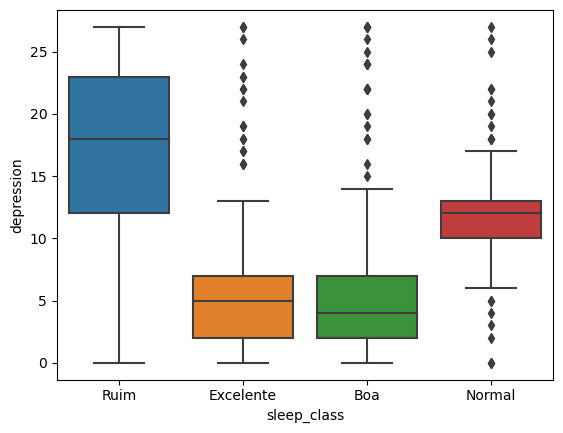

In [157]:
#2) Os alunos com má qualidade de sono também relatam níveis mais elevados de depressão?
sns.boxplot(x='sleep_class', y='depression', data=df)

In [158]:
#2) Os alunos com má qualidade de sono também relatam níveis mais elevados de depressão?
df[['sleep_quality', 'depression']].corr()

,sleep_quality,depression
sleep_quality,1.000000,-0.693161
depression,-0.693161,1.000000


In [159]:
#2) Os alunos com má qualidade de sono também relatam níveis mais elevados de depressão?
print("Temos uma correlação negativa moderada de -0.69 entre ansiedade e má qualidade no sono. Estudantes com má qualidade de sono apresentaram níveis superiores de depressão se comparado com o restante dos estudantes.")

Temos uma correlação negativa moderada de -0.69 entre ansiedade e má qualidade no sono. Estudantes com má qualidade de sono apresentaram níveis superiores de depressão se comparado com o restante dos estudantes.


<Axes: xlabel='mental_issues_class', ylabel='bullying'>

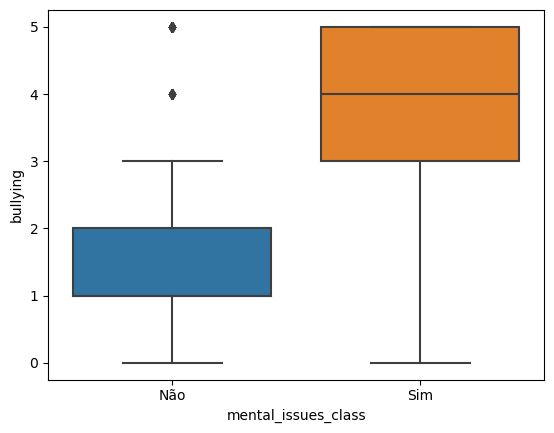

In [160]:
#3) Os alunos que sofrem bullying têm maior probabilidade de ter um histórico de problemas de saúde mental?
df['mental_issues_class'] = np.where(df['mental_health_history'] == 1, "Sim", "Não")
sns.boxplot(x='mental_issues_class', y='bullying', data=df)

In [161]:
#3) Os alunos que sofrem bullying têm maior probabilidade de ter um histórico de problemas de saúde mental?
df[['mental_health_history', 'bullying']].corr()

,mental_health_history,bullying
mental_health_history,1.000000,0.624366
bullying,0.624366,1.000000


In [162]:
#3) Os alunos que sofrem bullying têm maior probabilidade de ter um histórico de problemas de saúde mental?
df.query('bullying == 0 and mental_health_history > 0')
df.query('bullying > 0 and mental_health_history > 0')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,headache_frequence,sleep_class,mental_issues_class
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2,High,Ruim,Sim
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1,Medium,Ruim,Sim
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2,High,Ruim,Sim
5,20,13,1,21,3,3,1,4,3,2,2,1,2,5,2,5,1,4,4,5,2,High,Ruim,Sim
7,17,3,1,22,4,3,1,5,3,1,1,1,1,3,2,4,1,4,4,5,2,High,Ruim,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,9,13,1,18,5,3,0,0,3,2,3,5,2,4,1,4,1,2,5,1,0,High,Ruim,Sim
1088,20,10,1,18,3,3,1,4,3,2,1,1,2,4,1,5,1,4,4,4,2,High,Ruim,Sim
1091,19,11,1,25,4,3,1,5,5,1,1,2,1,4,2,4,1,5,5,5,2,High,Ruim,Sim
1098,21,0,1,19,5,3,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2,High,Ruim,Sim


In [163]:
#3) Os alunos que sofrem bullying têm maior probabilidade de ter um histórico de problemas de saúde mental?
print("Temos uma correlação positiva moderada de 0.62 entre problema de saúde mental e bullying. {} estudantes sofreram bullying e possuem problema de saúde mental, {} estudantes não sofreram bullying e possuem problema de saúde mental. É possível que estudantes que sofreram bullying tenham maior probabilidade em desenvolver problemas de saúde mental.".format(len(df.query('bullying > 0 and mental_health_history > 0')), len(df.query('bullying == 0 and mental_health_history > 0'))))

Temos uma correlação positiva moderada de 0.62 entre problema de saúde mental e bullying. 523 estudantes sofreram bullying e possuem problema de saúde mental, 19 estudantes não sofreram bullying e possuem problema de saúde mental. É possível que estudantes que sofreram bullying tenham maior probabilidade em desenvolver problemas de saúde mental.


# Fatores Acadêmicos:

**1) Quantos estudantes avaliam seu desempenho acadêmico como abaixo da média?**
**2) Quantos estudantes têm preocupações sobre suas futuras carreiras?**

In [164]:
#1) Quantos estudantes avaliam seu desempenho acadêmico como abaixo da média?
len(df.loc[df['academic_performance'] < df.academic_performance.mean()])
print("{} estudantes apresentaram desempenho acadêmico abaixo da média,".format(len(df.loc[df['academic_performance'] < df.academic_performance.mean()])))

561 estudantes apresentaram desempenho acadêmico abaixo da média,


In [165]:
#2) Quantos estudantes têm preocupações sobre suas futuras carreiras?
df.groupby('future_career_concerns')['future_career_concerns'].count()

future_career_concerns
0     30
1    327
2    199
3    173
4    185
5    186
Name: future_career_concerns, dtype: int64

In [166]:
#2) Quantos estudantes têm preocupações sobre suas futuras carreiras?
df['career_concern'] = np.where(df['future_career_concerns'] >= 4, "Yes", "No")

In [167]:
#2) Quantos estudantes têm preocupações sobre suas futuras carreiras?
print("{} estudantes apresentaram nível de preocupação acima de 4 em um range de 0 a 5".format(len(df.query('career_concern == "Yes"'))))

371 estudantes apresentaram nível de preocupação acima de 4 em um range de 0 a 5


# Fatores sociais:

**1) Quantos estudantes sentem que têm um forte apoio social?**
**2) Qual a porcentagem de alunos que sofreram bullying?**
**3) Quantos alunos participam de atividades extracurriculares?**

In [168]:
#1) Quantos estudantes sentem que têm um forte apoio social?
df.groupby('social_support')['social_support'].count()

social_support
0     88
1    412
2    142
3    458
Name: social_support, dtype: int64

In [169]:
#1) Quantos estudantes sentem que têm um forte apoio social?
df['support_class'] = np.where(df['social_support'] == 3, 'Forte', np.where(df['social_support'] == 2, 'Normal', np.where(df['social_support'] == 1, 'Fraco', 'None')))

In [170]:
#1) Quantos estudantes sentem que têm um forte apoio social?
len(df.query('support_class == "Forte"'))
print("Em um range de 0 a 3, classificamos como 'Forte', estudantes que relataram sentir apoio social igual a 3, {} estudantes relataram sentirem forte apoio social".format(len(df.query('support_class == "Forte"'))))

Em um range de 0 a 3, classificamos como 'Forte', estudantes que relataram sentir apoio social igual a 3, 458 estudantes relataram sentirem forte apoio social


In [171]:
#2) Qual a porcentagem de alunos que sofreram bullying?
print("{:.2f}% dos estudantes relatam que sofreram algum nível de bullying".format(len(df.loc[df['bullying'] > 0])/len(df)*100))

96.45% dos estudantes relatam que sofreram algum nível de bullying


In [172]:
#2) Qual a porcentagem de alunos que sofreram bullying?
#Porcentagem de alunos em cada nível de bullying com range de 0 a 5
df['bullying'].value_counts(1)

1    0.304545
3    0.180909
4    0.170000
5    0.157273
2    0.151818
0    0.035455
Name: bullying, dtype: float64

In [173]:
#3) Quantos alunos participam de atividades extracurriculares?
print("{} dos estudantes relataram ter participado em ao menos uma atividade extracurricular.".format(len(df.query('extracurricular_activities > 0'))))

1066 dos estudantes relataram ter participado em ao menos uma atividade extracurricular.


In [174]:
#3) Quantos alunos participam de atividades extracurriculares?
#Quantidade de alunos em cada nível de atividade extracurricular
df.groupby('extracurricular_activities')['extracurricular_activities'].count()

extracurricular_activities
0     34
1    184
2    332
3    178
4    198
5    174
Name: extracurricular_activities, dtype: int64

# Estresse x Fatores

**Como o estresse especificamente impacta e é impactado diante de outros fatores?**

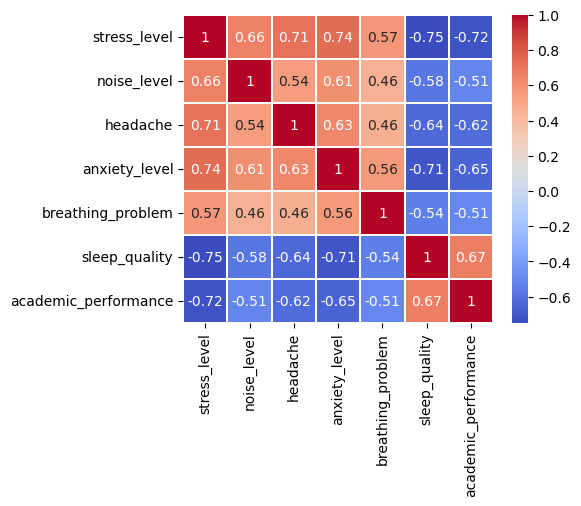

In [201]:
#Correlação entre os fatores
correlation_matrix = df[['stress_level', 'noise_level', 'headache', 'anxiety_level', 'breathing_problem', 'sleep_quality', 'academic_performance']].corr()

plt.gcf().set_size_inches(5, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.1)
plt.show()

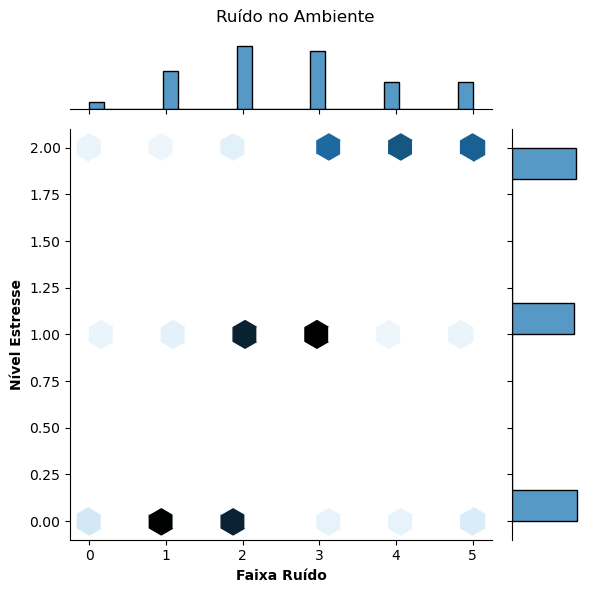

In [176]:
p = sns.jointplot(x='noise_level',y='stress_level',data=df,kind='hex')
p.fig.suptitle("Ruído no Ambiente")
p.ax_joint.set_xlabel('Faixa Ruído', fontweight='bold')
p.ax_joint.set_ylabel('Nível Estresse', fontweight='bold')
p.fig.tight_layout()

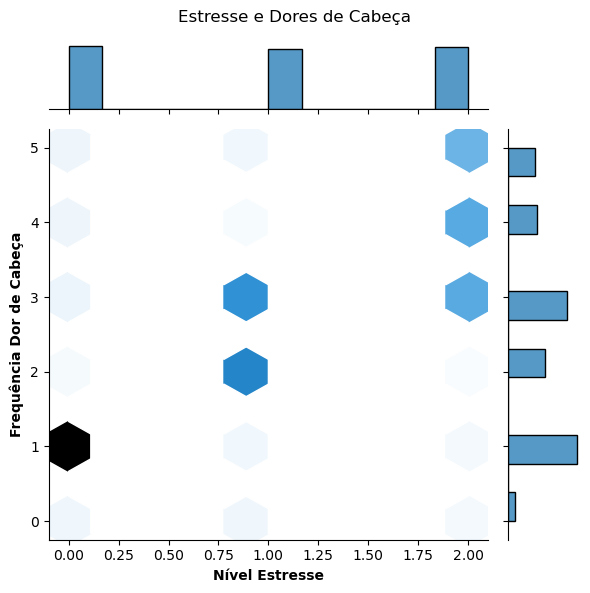

In [177]:
p = sns.jointplot(x='stress_level',y='headache',data=df,kind='hex')
p.fig.suptitle("Estresse e Dores de Cabeça")
p.ax_joint.set_xlabel('Nível Estresse', fontweight='bold')
p.ax_joint.set_ylabel('Frequência Dor de Cabeça', fontweight='bold')
p.fig.tight_layout()

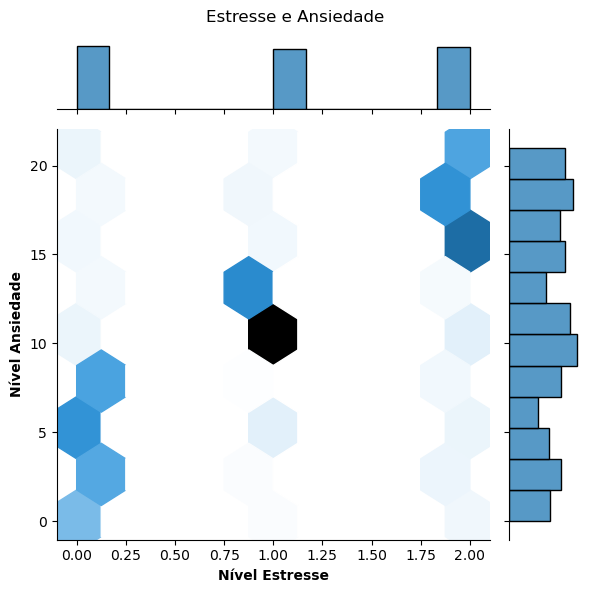

In [178]:
p = sns.jointplot(x='stress_level',y='anxiety_level',data=df,kind='hex')
p.fig.suptitle("Estresse e Ansiedade")
p.ax_joint.set_xlabel('Nível Estresse', fontweight='bold')
p.ax_joint.set_ylabel('Nível Ansiedade', fontweight='bold')
p.fig.tight_layout()

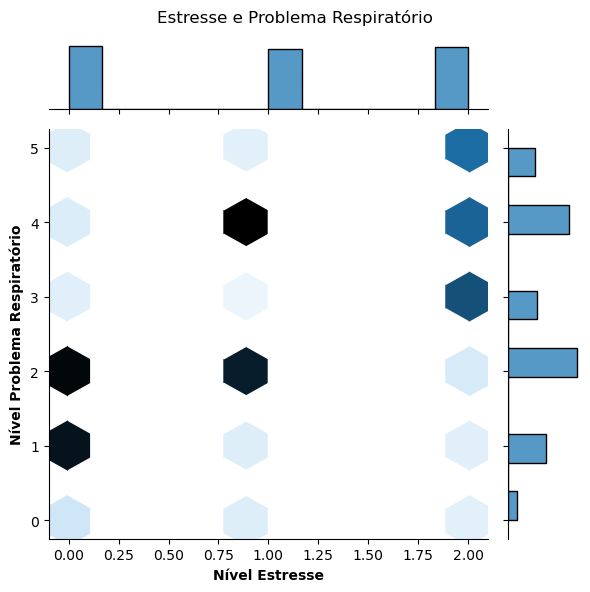

In [179]:
p = sns.jointplot(x='stress_level',y='breathing_problem',data=df,kind='hex')
p.fig.suptitle("Estresse e Problema Respiratório")
p.ax_joint.set_xlabel('Nível Estresse', fontweight='bold')
p.ax_joint.set_ylabel('Nível Problema Respiratório', fontweight='bold')
p.fig.tight_layout()

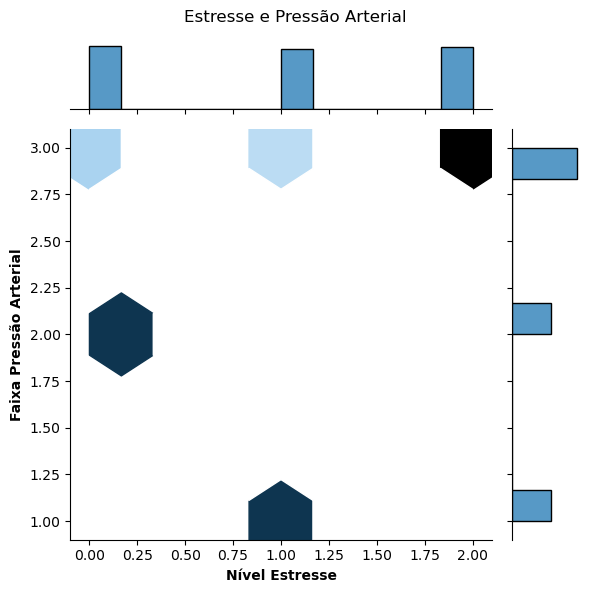

In [180]:
p = sns.jointplot(x='stress_level',y='blood_pressure',data=df,kind='hex')
p.fig.suptitle("Estresse e Pressão Arterial")
p.ax_joint.set_xlabel('Nível Estresse', fontweight='bold')
p.ax_joint.set_ylabel('Faixa Pressão Arterial', fontweight='bold')
p.fig.tight_layout()

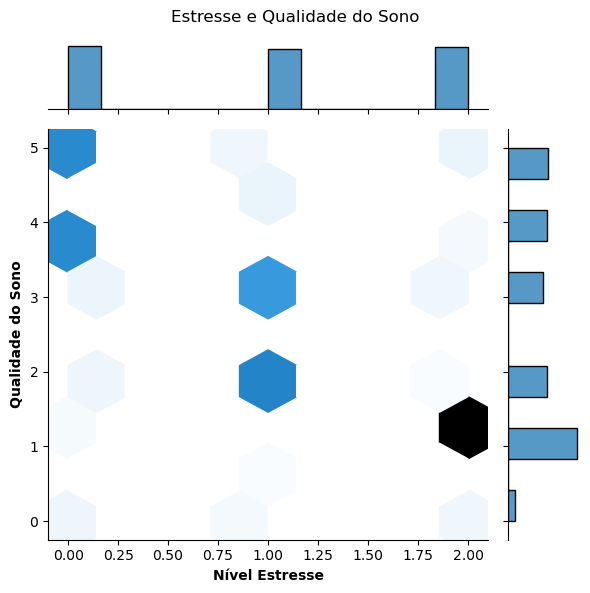

In [181]:
p = sns.jointplot(x='stress_level',y='sleep_quality',data=df,kind='hex')
p.fig.suptitle("Estresse e Qualidade do Sono")
p.ax_joint.set_xlabel('Nível Estresse', fontweight='bold')
p.ax_joint.set_ylabel('Qualidade do Sono', fontweight='bold')
p.fig.tight_layout()

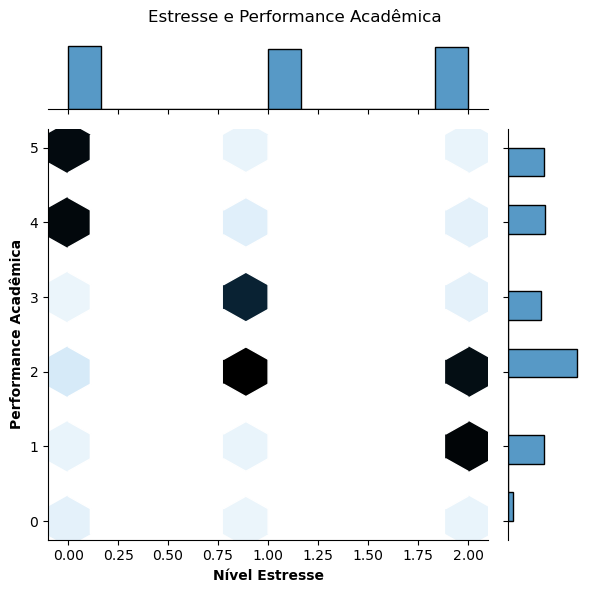

In [182]:
p = sns.jointplot(x='stress_level',y='academic_performance',data=df,kind='hex')
p.fig.suptitle("Estresse e Performance Acadêmica")
p.ax_joint.set_xlabel('Nível Estresse', fontweight='bold')
p.ax_joint.set_ylabel('Performance Acadêmica', fontweight='bold')
p.fig.tight_layout()